In [1]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# 1. Density Estimation

### This is some sample data

In [25]:
num_values = 500

actual_age = beta.rvs(100, 200 ,loc=10, scale=4, size=num_values)

actual_speed = gamma.rvs(a = 10, loc=10, scale=5, size=num_values)
          
correlation_dict = {'speed': sorted(actual_speed),
                      'age': sorted(actual_age) } 

df = pd.DataFrame.from_dict(correlation_dict) 

In [26]:
df.head(10)

,speed,age
0,20.696491,10.947443
1,28.426144,11.024509
2,28.468589,11.056577
3,30.724907,11.075860
4,31.209177,11.080446
5,31.993077,11.092803
6,32.373526,11.108628
7,32.728870,11.116746
8,32.826487,11.121690
9,33.307924,11.126896


### Fitting a Beta Distribution to the data

In [27]:
age_a, age_b, age_loc, age_scale = beta.fit(df.age)
synthetic_age_beta = beta.rvs(age_a, age_b ,loc=age_loc,scale=age_scale,size=len(df.age))


/home/sandeep/miniconda3/envs/sdv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/sandeep/miniconda3/envs/sdv/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


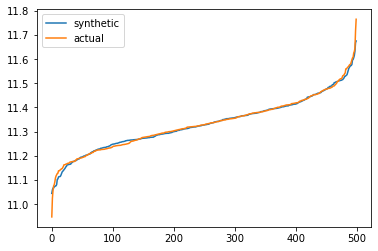

In [28]:
plt.plot(sorted(synthetic_age_beta), label='synthetic')
plt.plot(sorted(df.age), label='actual')
plt.legend()
plt.show()

In [29]:
speed_a, speed_loc, speed_scale = gamma.fit(df.speed)


# 2. Covariance and Correlation

Covariance = measure if elements from two arrays move in the same direction

correlation = normalized covariance (always between -1 and 1)

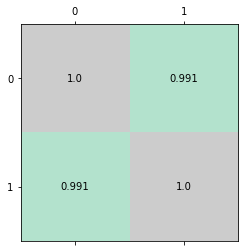

In [30]:
fig, ax = plt.subplots()

ax.matshow(df.corr().values, cmap=plt.cm.Pastel2)

for i in range(2):
    for j in range(2):
        c = round(df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

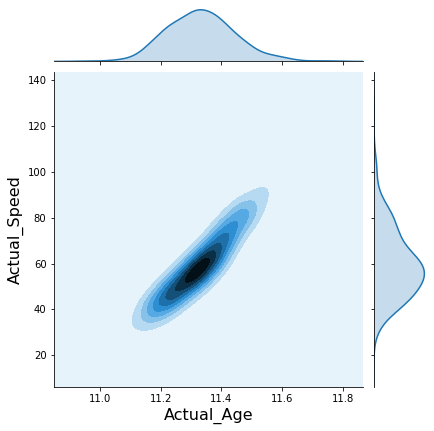

In [31]:

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);

In [32]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=df.corr().values)
x = mvnorm.rvs(500)

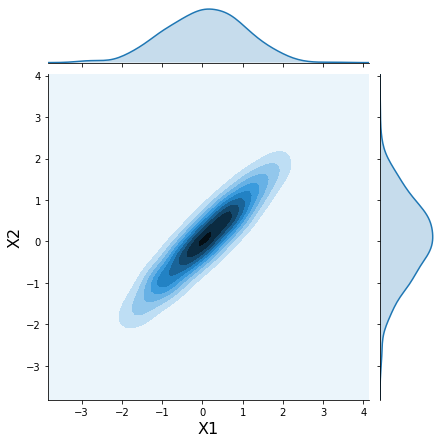

In [33]:
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

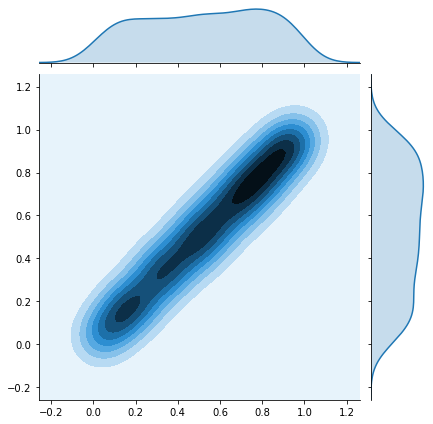

In [34]:
norm = stats.norm()
x_unif = norm.cdf(x)

h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='kde', stat_func=None)

In [35]:
age_distribution = stats.beta(a=age_a, b=age_b, loc=age_loc, scale=age_scale)  # Age column
#speed_distribution = stats.beta(a=speed_a, b=speed_b, loc=speed_loc, scale=speed_scale)  # Speed column

speed_distribution = stats.gamma(a=speed_a, loc=speed_loc,scale=speed_scale)

### this is your synthetic data with desired distribution and covariance

ppf = inverse of CDF

In [36]:
age_ppf = age_distribution.ppf(x_unif[:, 0])

speed_ppf = speed_distribution.ppf(x_unif[:, 1])

In [37]:
synthetic_df = pd.DataFrame({ 'speed' : speed_ppf, 'age' : age_ppf})

### matches the original covariance above

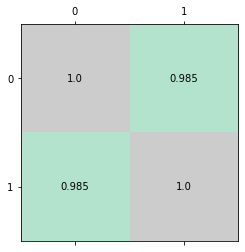

In [38]:
#plt.matshow(synthetic_df.corr().values)

fig, ax = plt.subplots()

ax.matshow(synthetic_df.corr().values, cmap=plt.cm.Pastel2)

for i in range(2):
    for j in range(2):
        c = round(synthetic_df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

In [39]:
synthetic_df.head(10)

,speed,age
0,53.110367,11.269953
1,92.237960,11.566075
2,54.625127,11.320097
3,45.388208,11.205178
4,59.729292,11.357608
5,59.953274,11.346087
6,69.823762,11.403160
7,54.264378,11.280658
8,50.145019,11.258901
9,73.687849,11.422027


In [40]:
# df['tmp'] = 1
# synthetic_df['tmp'] = 1

# merged_df = pd.merge(df, synthetic_df, on=['tmp'])
# merged_df = merged_df.drop('tmp', axis=1)
# merged_df.rename(columns={'speed_x': 'actual_speed', 'age_x': 'actual_age', 
#                           'speed_y' : 'synthetic_speed', 'age_y' : 'synthetic_age'}, inplace=True)

# merged_df.head(10)

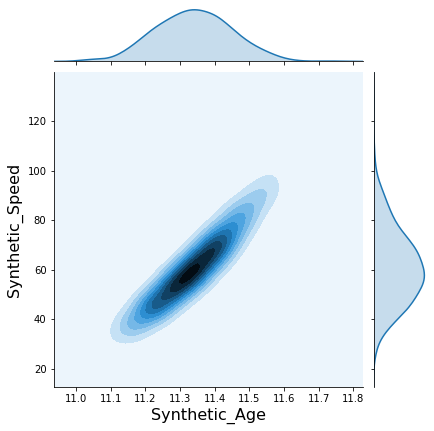

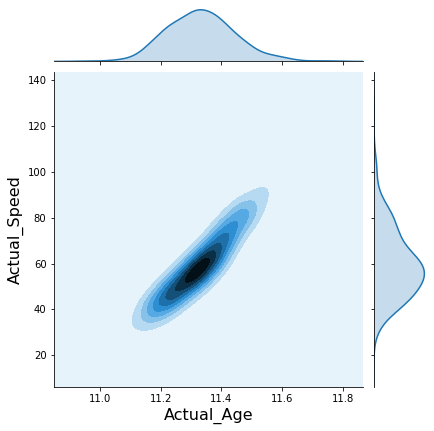

In [41]:

h = sns.jointplot(synthetic_df.age, synthetic_df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Synthetic_Age', 'Synthetic_Speed',  fontsize=16);

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);